In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


1. Generate Attendance Report of an Employee

In [2]:
#1. Attendence details of an employee for a particular day
import pandas as pd
from datetime import datetime

# Load the attendance file
attendance = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Employee_Attendance_Data.csv")

# Convert Date column to datetime
attendance['Date'] = pd.to_datetime(attendance['Date'], format="%d-%m-%Y")

# Input from user
emp_id = int(input("Enter Employee ID: "))
date_input = input("Enter Date (DD-MM-YYYY): ")
query_date = pd.to_datetime(date_input, format="%d-%m-%Y")

# Filter the attendance
record = attendance[
    (attendance['Employee ID'] == emp_id) &
    (attendance['Date'] == query_date)
]

# Output result
if record.empty:
    print(f"No attendance record found for Employee ID {emp_id} on {date_input}")
else:
    row = record.iloc[0]
    print(f"\nAttendance for Employee ID {emp_id} on {date_input}:")
    print(f"Punch In Time     : {row['Punch In Time']} ({row['Punch In Building']}, Device: {row['Punch In Device']})")
    print(f"Punch Out Time    : {row['Punch Out Time']} ({row['Punch Out Building']}, Device: {row['Punch Out Device']})")

Enter Employee ID: 15701
Enter Date (DD-MM-YYYY): 07-04-2025

Attendance for Employee ID 15701 on 07-04-2025:
Punch In Time     : 8:30 (GDN, Device: GDN1)
Punch Out Time    : 18:00 (GDN, Device: GDN2)


2. Track whether an employee was on time or late for a class scheduled on a particular day.

In [ ]:
# 2. Track whether an employee was on time or late for a class scheduled on a particular day.
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load data
attendance = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Employee_Attendance_Data.csv")
schedule = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Class_Schedule.csv")
slots = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Slots.csv")
calendar = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Academic_Calender.csv")

# Convert date formats
attendance['Date'] = pd.to_datetime(attendance['Date'], format="%d-%m-%Y")
calendar['Date'] = pd.to_datetime(calendar['Date'], format="%d-%m-%Y")

# Inputs
emp_id = int(input("Enter Employee ID: "))
date_input = input("Enter Date (DD-MM-YYYY): ")
query_date = pd.to_datetime(date_input, format="%d-%m-%Y")

# Get Day Name
calendar_day = calendar[calendar['Date'] == query_date]
if calendar_day.empty or calendar_day.iloc[0]['Status'] != 'Instructional':
    print("This is not an instructional day.")
    exit()

day_name = calendar_day.iloc[0]['Day']

# Get attendance
record = attendance[
    (attendance['Employee ID'] == emp_id) &
    (attendance['Date'] == query_date)
]

if record.empty:
    print("No attendance record found.")
    exit()

row = record.iloc[0]
punch_in_time_str = row['Punch In Time']
punch_in_time = datetime.strptime(punch_in_time_str, "%H:%M").time()
punch_in_building = row['Punch In Building']
punch_in_device = row['Punch In Device']

# Get class start time
emp_schedule = schedule[schedule['Employee ID'] == emp_id]
day_slots = slots[slots['Day'] == day_name]

# Filter slots for that day
class_slots = emp_schedule[emp_schedule['Slot ID'].isin(day_slots['Slot_ID'])]

# Output block
print(f"\nAttendance Check for Employee ID {emp_id} on {date_input}")
print(f"Punch In Time      : {punch_in_time_str}")
print(f"Punch In Building  : {punch_in_building}")
print(f"Punch In Device    : {punch_in_device}")

if class_slots.empty:
    print("No scheduled classes for this day.")
    print("Note: Cannot check for late entry in class.\n")
else:
    # Get earliest class start time
    min_time = None
    for slot_id in class_slots['Slot ID']:
        times = day_slots[day_slots['Slot_ID'] == slot_id]['Start_Time']
        for t in times:
            slot_start = datetime.strptime(t, "%H:%M").time()
            if min_time is None or slot_start < min_time:
                min_time = slot_start

    print(f"Class Start Time   : {min_time}")

    if punch_in_time <= min_time:
        print("Arrived On Time")
    else:
        print("Late Entry for Class!!!")

Enter Employee ID: 13665
Enter Date (DD-MM-YYYY): 10-04-2025

Attendance Check for Employee ID 13665 on 10-04-2025
Punch In Time      : 8:00
Punch In Building  : ALM
Punch In Device    : ALM1
Class Start Time   : 15:51:00
Arrived On Time


3. Track whether an employee was on time or late for college scheduled on a particular day.

In [ ]:
# 3. Track whether an employee was on time or late for college scheduled on a particular day.
import pandas as pd
from datetime import datetime

# Load data
attendance = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Employee_Attendance_Data.csv")
schedule = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Class_Schedule.csv")
slots = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Slots.csv")
calendar = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Academic_Calender.csv")

# Preprocess dates
attendance['Date'] = pd.to_datetime(attendance['Date'], format="%d-%m-%Y")
calendar['Date'] = pd.to_datetime(calendar['Date'], format="%d-%m-%Y")

# Inputs
emp_id = int(input("Enter Employee ID: "))
date_input = input("Enter Date (DD-MM-YYYY): ")
query_date = pd.to_datetime(date_input, format="%d-%m-%Y")
office_start_time = datetime.strptime("08:00", "%H:%M").time()

# Get Day Name
calendar_day = calendar[calendar['Date'] == query_date]
if calendar_day.empty or calendar_day.iloc[0]['Status'] != 'Instructional':
    print("This is not an instructional day.")
    exit()

day_name = calendar_day.iloc[0]['Day']

# Get attendance record
record = attendance[
    (attendance['Employee ID'] == emp_id) &
    (attendance['Date'] == query_date)
]

if record.empty:
    print("No attendance record found.")
    exit()

row = record.iloc[0]
punch_in_time_str = row['Punch In Time']
punch_in_time = datetime.strptime(punch_in_time_str, "%H:%M").time()

# Get class schedule for the day
emp_schedule = schedule[schedule['Employee ID'] == emp_id]
day_slots = slots[slots['Day'] == day_name]
class_slots = emp_schedule[emp_schedule['Slot ID'].isin(day_slots['Slot_ID'])]

# Attendance Summary Output
print(f"\n📋 Attendance Check for Employee ID {emp_id} on {date_input}")
print(f"Punch In Time        : {punch_in_time_str}")

# Final Entry Status Evaluation
if class_slots.empty:
    print("Class Start Time     : N/A (No Class Scheduled)")
    if punch_in_time > office_start_time:
        print("Entry Status         : Late to University (No Class)")
    else:
        print("Entry Status         : On Time (No Class)")
else:
    # Get earliest class start time
    min_class_time = None
    for slot_id in class_slots['Slot ID']:
        times = day_slots[day_slots['Slot_ID'] == slot_id]['Start_Time']
        for t in times:
            time_obj = datetime.strptime(t, "%H:%M").time()
            if min_class_time is None or time_obj < min_class_time:
                min_class_time = time_obj

    print(f"Class Start Time     : {min_class_time}")
    class_late = punch_in_time > min_class_time
    office_late = punch_in_time > office_start_time

    if class_late:
        print("Entry Status         : Late to Class")
    elif office_late:
        print("Entry Status         : On Time for Class but Late to University")
    else:
        print("Entry Status         : Arrived On Time")

Enter Employee ID: 13665
Enter Date (DD-MM-YYYY): 10-04-2025

📋 Attendance Check for Employee ID 13665 on 10-04-2025
Punch In Time        : 8:00
Class Start Time     : 15:51:00
Entry Status         : Arrived On Time


4. Tracks punch-in/punch-out information of an employee for a particular day. Also alerts if employee punches in/out from a building that is neither their cabin building nor class building

In [ ]:
#4 if cabin is in different building and class in different building but punching elsewhere
import pandas as pd
from datetime import datetime

# Load data
attendance = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Employee_Attendance_Data.csv")
cabin = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Cabin_Info.csv")
schedule = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Class_Schedule.csv")
slots = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Slots.csv")
calendar = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Academic_Calender.csv")

# Preprocess
attendance['Date'] = pd.to_datetime(attendance['Date'], format="%d-%m-%Y")
calendar['Date'] = pd.to_datetime(calendar['Date'], format="%d-%m-%Y")

# Input
emp_id = int(input("Enter Employee ID: "))
date_input = input("Enter Date (DD-MM-YYYY): ")
query_date = pd.to_datetime(date_input, format="%d-%m-%Y")

# Get day name
day_row = calendar[calendar['Date'] == query_date]
if day_row.empty:
    print("Invalid date entered (not in academic calendar).")
    exit()

day_name = day_row['Day'].values[0]

# Get punch in data
record = attendance[
    (attendance['Employee ID'] == emp_id) &
    (attendance['Date'] == query_date)
]

if record.empty:
    print(f"No attendance found for Employee ID {emp_id} on {date_input}")
else:
    row = record.iloc[0]
    punch_in_building = row['Punch In Building']
    punch_in_device = row['Punch In Device']
    punch_in_time = row['Punch In Time']

    punch_out_building = row['Punch Out Building']
    punch_out_device = row['Punch Out Device']
    punch_out_time = row['Punch Out Time']

    # Get cabin building
    emp_cabin = cabin[cabin['Emp_ID'] == emp_id]
    cabin_building = emp_cabin['Building'].values[0] if not emp_cabin.empty else None

    # Get class buildings for that day
    emp_schedule = schedule[schedule['Employee ID'] == emp_id]
    relevant_slots = slots[slots['Day'] == day_name]
    class_buildings = emp_schedule[
        emp_schedule['Slot ID'].isin(relevant_slots['Slot_ID'])
    ]['Class Building'].unique().tolist()

    # Prepare categorized allowed buildings
    allowed_class_buildings = set(class_buildings)
    allowed_cabin_building = set([cabin_building]) if cabin_building else set()
    total_allowed_buildings = allowed_class_buildings.union(allowed_cabin_building)

    # Output
    print(f"\nAttendance for Employee ID {emp_id} on {date_input}")
    print(f"Punch In Time      : {punch_in_time}")
    print(f"Punch In Building  : {punch_in_building}")
    print(f"Punch In Device    : {punch_in_device}")
    print(f"Punch Out Time     : {punch_out_time}")
    print(f"Punch Out Building : {punch_out_building}")
    print(f"Punch Out Device   : {punch_out_device}")
    print(f"\nAllowed Buildings:")
    if allowed_class_buildings:
        print(f"Class Buildings    : {', '.join(allowed_class_buildings)}")
    if allowed_cabin_building:
        print(f"Cabin Building     : {', '.join(allowed_cabin_building)}")

    # Suspicious detection
    if punch_in_building not in total_allowed_buildings:
        print(f"\nSuspicious Punch In Detected!")
        print(f"Employee punched in from '{punch_in_building}' using device '{punch_in_device}', which is not an allowed location.")

    if punch_out_building not in total_allowed_buildings:
        print(f"\nSuspicious Punch Out Detected!")
        print(f"Employee punched out from '{punch_out_building}' using device '{punch_out_device}', which is not an allowed location.")

    if punch_in_building in total_allowed_buildings and punch_out_building in total_allowed_buildings:
        print("\nBoth punch locations are valid.")

Enter Employee ID: 13665
Enter Date (DD-MM-YYYY): 10-04-2025

Attendance for Employee ID 13665 on 10-04-2025
Punch In Time      : 8:00
Punch In Building  : ALM
Punch In Device    : ALM1
Punch Out Time     : 17:50
Punch Out Building : GDN
Punch Out Device   : GDN2

Allowed Buildings:
Class Buildings    : MGR
Cabin Building     : MGR

Suspicious Punch In Detected!
Employee punched in from 'ALM' using device 'ALM1', which is not an allowed location.

Suspicious Punch Out Detected!
Employee punched out from 'GDN' using device 'GDN2', which is not an allowed location.


5. A detailed Attendance Report that tracks entry time, exit time, punch in punch out building and late entry to university or class.

    Line Chart is to show late entry trend over time

Enter Employee ID: 10312
Enter start date (DD-MM-YYYY): 07-04-2025
Enter end date (DD-MM-YYYY): 13-04-2025

📋 Attendance Report:
07-04-2025 (Monday) - Entry: Late to University (No Class) at 8:01 (SMV, SMV1) [Unknown] | Exit: Left (No Class) at 18:10 (TT, TT2) [Cabin]
08-04-2025 (Tuesday) - Entry: On Time (No Class) at 7:55 (SMV, SMV1) [Unknown] | Exit: Left (No Class) at 18:00 (TT, TT2) [Cabin]
09-04-2025 (Wednesday) - Entry: Absent at N/A [-] | Exit: Absent at N/A [-]
10-04-2025 (Thursday) - Entry: On Time (No Class) at 8:00 (GDN, GDN1) [Unknown] | Exit: Left (No Class) at 18:00 (GDN, GDN2) [Unknown]
11-04-2025 (Friday) - Entry: On Time for Class but Late to University at 8:15 (ALM, ALM1) [Unknown] | Exit: Left On Time at 18:00 (GDN, GDN2) [Class]
12-04-2025 (Saturday) - Entry: On Time (No Class) at 8:00 (MGR, MGR1) [Unknown] | Exit: Left (No Class) at 18:10 (PRP, PRP2) [Unknown]
13-04-2025 (Sunday) - Non Instructional Day


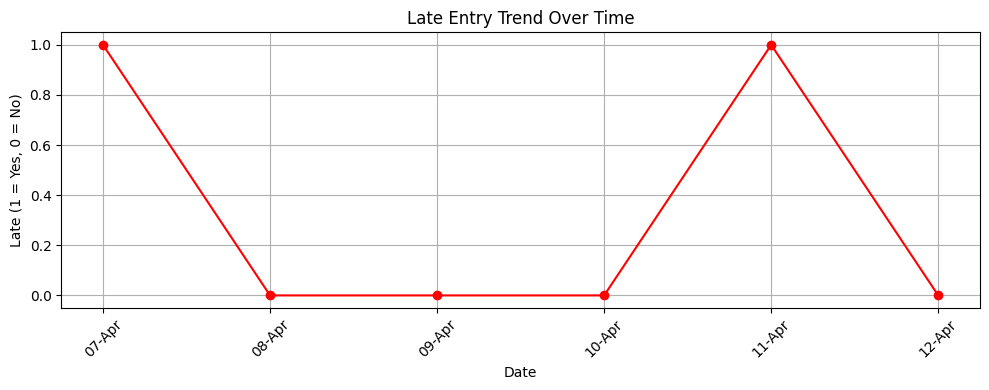

In [8]:
# Imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load CSVs
cabin = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Cabin_Info.csv")
schedule = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Class_Schedule.csv")
attendance = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Employee_Attendance_Data.csv")
leave = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Leave_Info.csv")
slots = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Slots.csv")
calender = pd.read_csv("/content/drive/MyDrive/python_project/attendance_analysis_system/Academic_Calender.csv")

# Preprocessing
attendance['Date'] = pd.to_datetime(attendance['Date'], format="%d-%m-%Y")
calender['Date'] = pd.to_datetime(calender['Date'], format="%d-%m-%Y")

# Input
empID = int(input("Enter Employee ID: "))
start_date = pd.to_datetime(input("Enter start date (DD-MM-YYYY): "), format="%d-%m-%Y")
end_date = pd.to_datetime(input("Enter end date (DD-MM-YYYY): "), format="%d-%m-%Y")

# Constants
office_start_time = datetime.strptime("08:00", "%H:%M").time()

# Functions
def get_schedule(emp_id, schedule_df):
    return schedule_df[schedule_df['Employee ID'] == emp_id][['Class Building', 'Slot ID']].values.tolist()

def build_class_times_by_date(emp_schedule, slots_df, calender_df):
    date_to_times = {}
    instructional = calender_df[calender_df['Status'] == 'Instructional']
    for _, slot_id in emp_schedule:
        slot_rows = slots_df[slots_df['Slot_ID'] == slot_id]
        for _, slot in slot_rows.iterrows():
            day = slot['Day']
            start_time = datetime.strptime(slot['Start_Time'], "%H:%M").time()
            end_time = datetime.strptime(slot['End_Time'], "%H:%M").time()
            matching_dates = instructional[instructional['Day'] == day]
            for _, date_row in matching_dates.iterrows():
                date = date_row['Date']
                if date not in date_to_times:
                    date_to_times[date] = (start_time, end_time)
                else:
                    existing_start, existing_end = date_to_times[date]
                    date_to_times[date] = (min(existing_start, start_time), max(existing_end, end_time))
    return date_to_times

# Processing
date_range_df = calender[
    (calender['Date'] >= start_date) & (calender['Date'] <= end_date)
]

emp_schedule = get_schedule(empID, schedule)
class_times_by_date = build_class_times_by_date(emp_schedule, slots, calender)

# For visualization
lateness_flags = []
dates = []

# Attendance Report
print("\n📋 Attendance Report:")
for _, row in date_range_df.iterrows():
    date = row['Date']
    day = row['Day']
    status = row['Status']
    date_str = date.strftime('%d-%m-%Y')
    label = f"{date_str} ({day})"

    if status != 'Instructional':
        print(f"{label} - Non Instructional Day")
        continue

    class_start, class_end = class_times_by_date.get(date, (None, None))
    emp_attendance = attendance[
        (attendance['Employee ID'] == empID) & (attendance['Date'] == date)
    ]

    if emp_attendance.empty:
        entry_status = "Absent"
        exit_status = "Absent"
        punch_in_info = "N/A"
        punch_out_info = "N/A"
        punch_in_location = "-"
        punch_out_location = "-"
    else:
        row = emp_attendance.iloc[0]
        punch_in_time = datetime.strptime(row['Punch In Time'], "%H:%M").time()
        punch_out_time = datetime.strptime(row['Punch Out Time'], "%H:%M").time()
        punch_in_building = row['Punch In Building']
        punch_out_building = row['Punch Out Building']
        punch_in_device = row['Punch In Device']
        punch_out_device = row['Punch Out Device']

        punch_in_info = f"{row['Punch In Time']} ({punch_in_building}, {punch_in_device})"
        punch_out_info = f"{row['Punch Out Time']} ({punch_out_building}, {punch_out_device})"

        # Lateness checks
        office_late = punch_in_time > office_start_time
        class_late = class_start and punch_in_time > class_start

        if class_start:
            if class_late:
                entry_status = "Late to Class"
            elif office_late:
                entry_status = "On Time for Class but Late to University"
            else:
                entry_status = "Arrived On Time"
        else:
            if office_late:
                entry_status = "Late to University (No Class)"
            else:
                entry_status = "On Time (No Class)"

        # Exit status
        if class_end:
            exit_status = "Left On Time" if punch_out_time >= class_end else "Left Early"
        else:
            exit_status = "Left (No Class)"

        # Get cabin building
        emp_cabin = cabin[cabin['Emp_ID'] == empID]
        cabin_building = emp_cabin['Building'].values[0] if not emp_cabin.empty else None

        # Get class buildings for the current day
        emp_schedule_df = schedule[schedule['Employee ID'] == empID]
        relevant_slots = slots[slots['Day'] == day]
        class_buildings_today = emp_schedule_df[
            emp_schedule_df['Slot ID'].isin(relevant_slots['Slot_ID'])
        ]['Class Building'].unique().tolist()

        # Punch-in location type
        if punch_in_building in class_buildings_today and punch_in_building == cabin_building:
            punch_in_location = "Class + Cabin"
        elif punch_in_building in class_buildings_today:
            punch_in_location = "Class"
        elif punch_in_building == cabin_building:
            punch_in_location = "Cabin"
        else:
            punch_in_location = "Unknown"

        # Punch-out location type
        if punch_out_building in class_buildings_today and punch_out_building == cabin_building:
            punch_out_location = "Class + Cabin"
        elif punch_out_building in class_buildings_today:
            punch_out_location = "Class"
        elif punch_out_building == cabin_building:
            punch_out_location = "Cabin"
        else:
            punch_out_location = "Unknown"

    # Print entry
    print(f"{label} - Entry: {entry_status} at {punch_in_info} [{punch_in_location}] | Exit: {exit_status} at {punch_out_info} [{punch_out_location}]")

    # Add to line chart data
    dates.append(date.strftime('%d-%b'))
    lateness_flags.append(1 if "Late" in entry_status else 0)

# Line Chart: Late Entry Trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(dates, lateness_flags, marker='o', linestyle='-', color='red')
plt.title("Late Entry Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Late (1 = Yes, 0 = No)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()